In [137]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

data=pd.read_csv('heart_disease.csv')
labels=data.values[:,-1]
labels[labels>1]=1
labels[labels==0]=-1
labels=labels.astype(int)

data=data.values[:,:-1]



In [123]:
# Only run before decision boundary visualization
data=data[:,[3,7]]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

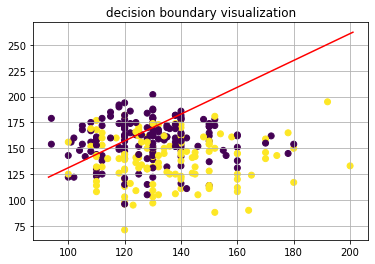

In [136]:

#colour paraméter csak egy megadja, hogy eredeti labels vagy új pred értékek alapján készítse el a plotot
def visualize(data,labels,w,b,colour=labels):
  w1=0
  w2=1

  x_min, x_max = data[:, w1].min() - 1, data[:, w1].max() + 1
  x= np.linspace(x_min,x_max)
  y = -(b/w[w2])-w[w1]/w[w2]*x


  plt.plot(x, y, '-r')

  plt.scatter(data[:,w1],data[:,w2],c=colour,marker='o')

  plt.title('decision boundary visualization')

  plt.grid()
  plt.show()


visualize(data,labels,w,b)

In [145]:
class Perceptron():
    def __init__(self):
        self.w_hat = None
        self.bias = None

    def fit(self,data,labels,max_iterations=500):
        n_samples, n_features = data.shape


        self.w_hat = np.zeros(n_features)
        
        self.bias = 0

        for _ in range(max_iterations):
        
          
          for i,occ in enumerate(data):

              output =np.dot(occ, self.w_hat)+self.bias
              
              
              y_predicted= np.where(output > 0,1,-1)

              update = labels[i] - y_predicted
              
              
              self.w_hat += update*occ
              self.bias += update
          

    def predict(self,data):
        output = np.dot(data, self.w_hat) + self.bias
        
        y_predicted= np.where(output >0, 1, -1)
        return y_predicted
        

    def accuracy(self,true,prediction):
      
      return np.sum(true== prediction) / true.shape[0]


    def sensitivity(self,true,prediction):
        TP=0
        FN=0
        
        for i in range(0,len(true)):
          if true[i] == 1 and prediction[i] ==1:
            TP+=1
          elif true[i] == 1 and prediction[i] ==-1:
            FN+=1

        return TP/(TP+FN)
    
    def get_weights(self):
      return self.w_hat
    def get_bias(self):
      return self.bias
 
    

In [146]:
pla=Perceptron()
pla.fit(data,labels)
prediction=pla.predict(data)
print(pla.accuracy(labels,prediction))
print(pla.sensitivity(labels,prediction))

w = pla.get_weights()
b = pla.get_bias()

print(w)
print(b)

0.8145695364238411
0.8129496402877698
[ -498.  11280.  19598.    496.    240.    516.   6356.  -2058.  15008.
  8774.8  1620.  29184.  23546. ]
-474


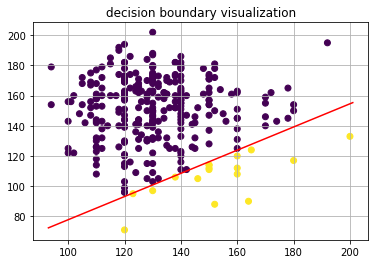